# A Movie Data Analysis for Microsoft

<img src= "./images/You_are_in_the_%20movies.jpg" width= 850 />

## Overview

This project analyzes data from the movie industry for the hypothetical client [Microsoft](https://www.microsoft.com/en-us/?ql=4).  Descriptive analysis of movie genres, directors, and writers provides insight into which genres outperform others and who the top-performing talent are.   The primary metric used is return on investment (ROI) but other metrics are included as they can provide insight into other factors such as prominence. Should it desire to enter the movie industry, Microsoft can use this analysis to decide which type of movies to invest in and who to hire.

## Business Opportunity 

![](./images/Rachat_d'Activision_et_Blizzard.webp.png)

Since 2005 when [Microsoft sold its stake in NBC to Comcast](https://www.reuters.com/article/us-msnbc-microsoft-idUSBRE86F04W20120716), it has not had a presence in the movie or cable industry.  Instead, it’s [acquisitions](https://acquiredby.co/what-companies-does-microsoft-own/) have focused on software companies (ex. Intrinsa, Github), social networking sites (ex.  LinkedIN), telecommunications (ex. Skype), speech recognition (ex. Tellme Network, Nuance Communications), advertising (ex. aQuantive, Xandr), music (ex. Musiwave), cloud computing (ex. Adallom), machine learning (ex. Equivio), and gaming (ex. Mojang, ZeniMax Media).  Its 2022 acquisition of [Activision Blizzard for $68.7 billion](https://theorg.com/insights/what-companies-does-microsoft-own) continued its expansion into the gaming industry.   While not necessarily its primary purpose, the Activision acquisition gives Microsoft rights to popular video game titles including [Overwatch, Diablo, World of Warcraft, Candy Crush, StarCraft, and Call of Duty]( https://news.microsoft.com/2022/01/18/microsoft-to-acquire-activision-blizzard-to-bring-the-joy-and-community-of-gaming-to-everyone-across-every-device/).  It also expands Microsoft’s CGI talent pool.  The presence of in-house CGI talent and the rights to popular video game titles puts Microsoft in a position to expand into the movie industry should it choose to do so.  Income from movies can help recoup some of the money Microsoft spent on the acquisition of Activision.

## The Data Sources

The two sources of data used in this analysis are [IMBD](https://www.imdb.com/search/) and [The Numbers]( https://www.the-numbers.com/movies/#tab=year).   IMBD is an online searchable database that contains information about a film such as genre, actors, directors, writers, ratings, and “Ways to Watch”.   The Numbers, on the other hand, includes information about worldwide gross, domestic gross, and budget.   These two sites are complimentary as they each have information the other site doesn’t have.  This analysis will merge these two datasets to provide a more complete overview of the movie industry.  IMBD is  owned by Amazon and The Numbers is run by the company [Nash Information Services](https://www.nashinfoservices.com/).

## Data Understanding

<img src= "./images/300px-IMDb_logo.svg.png" width= 200 />

IMBD is an SQL database comprised of multiple dataframes. The ones used in this analysis are movie basics, persons, writers, and directors as these four dataframes provide information on movie titles, genres, directors, and writers which are the four main categorical criteria used in this analysis.  Runtime minutes, birth year, and death year are stored as floats.  Start year is stored as an integer.  The rest of the column values are stored as objects.

In [1]:
# This imports data from the IMBD database, as well as the pandas and numpy libraries.  
import pandas as pd
import numpy as np
! unzip -n zippedData/im.db.zip
import sqlite3
conn = sqlite3.connect("im.db")

Archive:  zippedData/im.db.zip


In [2]:
# This dataframe will be used for the analysis of genres and joined with other SQL datafromes for an analysis of directors
# and writers.
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
# Genres has some missing values.  These will need to be dropped.  There are 146144 movies in the database.
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
# The directors dataframe requires the use of the persons dataframe in order to return director names.
directors = pd.read_sql("SELECT * FROM directors;", conn)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [5]:
# These values are stored as objects. None are missing. There are 291174 directors in the database.
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [6]:
# The writers dataframe is essentially the same as the directors dataframe, the main difference being that is specific
# to writers.
writers = pd.read_sql("SELECT * FROM writers;", conn)
writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [7]:
writers.info()  # There are 255873 writers in the database.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [8]:
# The persons dataframe enables primary names to be added into a dataframe visa vi their person_id.  
# It also cantains information about birth and death year which can be used as part of a more in-depth analysis.
persons = pd.read_sql("SELECT * FROM persons;", conn)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [9]:
# Birth year and death year are stored as floats so they don't need to be cleaned.  There are missing values as everyone
# should have a birth year. One might need to drop some rows depending on what kind of analysis one is doing.  
# There are 606648 total persons in the database.
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


![](./images/The_Numbers.jpg)

The Numbers is a CSV file that contains information about release date, movie title, production budget, domestic gross, and worldwide gross.  The values of the aforementioned columns are all stored as objects.

In [10]:
# This imports data from The Numbers csv file.
tn_movies = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# Release date, production budget, domestic gross, and worldwide gross will all need to be converted into integers or floats
# in order to do numerical analysis and joins.  There are 5782 movies in the database.
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

<img src= "./images/300px-IMDb_logo.svg.png" width= 200 />

### Joining IMBD's SQL Databases

IMBD’s movie basics dataframe has all of the IMBD data necessary for an analysis on genres.  In order to create dataframes that contain the IMBD data necessary for an analysis on directors and writers, the directors and writers dataframes need to be joined with the movie basics and persons dataframes.

In [12]:
# This joins the movie bascis, directors, and persons dataframes to create an IMBD dataframe that will be used in 
# the analysis of directors.
movie_basics_directors = pd.read_sql("""
SELECT *, dr.person_id AS director_id
FROM movie_basics
JOIN directors AS dr
     USING(movie_id)
JOIN persons as pe
    USING(person_id);    
""", conn)
movie_basics_directors.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,director_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor",nm0002411


In [13]:
#This does the same thing as above, only using the writers dataframe instead of the directors dataframe.
movie_basics_writers = pd.read_sql( """
SELECT *, wr.person_id AS writer_id
FROM movie_basics
JOIN writers as wr
    USING(movie_id)
JOIN persons as pe
    USING(person_id); 
""", conn)
movie_basics_writers.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,writer_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0023551,Abrar Alvi,1927.0,2009.0,"writer,actor,director",nm0023551
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0347899,Gulzar,1936.0,NaN,"music_department,writer,soundtrack",nm0347899
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm1194313,Mahasweta Devi,1926.0,2016.0,writer,nm1194313
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm1391276,Anjana Rawail,NaN,NaN,"writer,costume_designer",nm1391276
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer",nm0000080


### Data Cleaning

The genres column has multiple values stored in the same row (Comedy and Drama, for example). This will prove problematic once it comes time to do an analysis of genres. While technically feature engineering, the movie basics dataframe needs to be prepared early on as the explode function utilized will not work once the dataframe is joined with The Numbers dataframe. The genres column also has several movies that don’t have genres listed.  These rows were dropped. 

Both the writers and the directors dataframes have duplicates. This is likely due to other variables included in the database. For example, a director may be listed multiple times due to the fact that there are multiple writers working with him or her.  These duplicates were also dropped.

#### Genres

In [14]:
# The function value_counts reveals that many movies have multiple genres listed on the same row.  In order for a movie to be
# counted as Drama and Comendy instead of the genre "Comedy, Drama", the genre needs to be seperated onto seperate rows.
movie_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [15]:
# The explode function works with lists.  The string split function turns the values in the gernes column into lists.
movie_basics['genres_list'] = movie_basics['genres'].str.split(',')
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [16]:
#The explode function seperates the genres onto seperate rows. This is being saved as a new name.
movie_basics1 = movie_basics.explode('genres_list')
movie_basics1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Drama


In [17]:
# The info function reveals we have multiple null values in the genres_list that need to be dropped.
movie_basics1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234958 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         234958 non-null  object 
 1   primary_title    234958 non-null  object 
 2   original_title   234937 non-null  object 
 3   start_year       234958 non-null  int64  
 4   runtime_minutes  195904 non-null  float64
 5   genres           229550 non-null  object 
 6   genres_list      229550 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.3+ MB


In [18]:
# The following function drops the null values in the genres_list column so that only movies with listed genres remain.
movie_basics1 = movie_basics1.dropna(subset = ['genres_list'])
movie_basics1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229550 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         229550 non-null  object 
 1   primary_title    229550 non-null  object 
 2   original_title   229548 non-null  object 
 3   start_year       229550 non-null  int64  
 4   runtime_minutes  193732 non-null  float64
 5   genres           229550 non-null  object 
 6   genres_list      229550 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.0+ MB


#### Directors

In [19]:
# The function value_counts reveals that many directors are listed more than once. 
movie_basics_directors['primary_name'].value_counts()

Tony Newton        238
Jason Impey        190
Shane Ryan         186
Ruben Rodriguez    181
Sam Mason-Bell     144
                  ... 
Mike King            1
Cristian Piazza      1
Qaisar Sanobar       1
Safdar Hussain       1
Kiran Gawade         1
Name: primary_name, Length: 106757, dtype: int64

In [20]:
# Anthony Russo is one such director.  All of the duplicated columns have the same values so the drop_duplicates function should
# work to remove multiple mentions of his name for the production of the same movie. 
movie_basics_directors[movie_basics_directors["primary_name"]=="Anthony Russo"].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,director_id
37914,tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
37915,tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
37916,tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
37917,tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
37918,tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577


In [21]:
# This removes the duplicates.
movie_basics_directors = movie_basics_directors.drop_duplicates()

In [22]:
# Now Anthony Russo is only mentioned once per movie he directed.
movie_basics_directors[movie_basics_directors["primary_name"]=="Anthony Russo"].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,director_id
37914,tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
125264,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
154748,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
154772,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577
282341,tt9130508,Cherry,Cherry,2020,NaN,Drama,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",nm0751577


In [23]:
# There are still multiples but this likely due to multiple movie productions such as Avengers and Captain America movies in 
# the case of Anthony Russo.
movie_basics_directors['primary_name'].value_counts()

Omer Pasha          62
Larry Rosen         53
Rajiv Chilaka       49
Stephan Düfel       48
Graeme Duane        45
                    ..
Michael Okum         1
Adam LeHouillier     1
Lori Cholewka        1
Brion Dodson         1
Kiran Gawade         1
Name: primary_name, Length: 106757, dtype: int64

#### Writers

In [24]:
# The same problem arises with writers.  For example, William Shakespeare is only listed once for Gnomeo & Juliet but twice
# for Hamlet A.D.D.  The drop_duplicates should also work for writers.
movie_basics_writers[movie_basics_writers["primary_name"] == 'William Shakespeare'].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,writer_id
122,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011,84.0,"Adventure,Animation,Comedy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
1016,tt0892062,Hamlet A.D.D.,Hamlet A.D.D.,2014,95.0,"Animation,Comedy,Fantasy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
1017,tt0892062,Hamlet A.D.D.,Hamlet A.D.D.,2014,95.0,"Animation,Comedy,Fantasy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
4381,tt10332120,Much Ado About Nothing,Much Ado About Nothing,2019,130.0,Drama,nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
8488,tt1274300,The Tempest,The Tempest,2010,110.0,"Comedy,Drama,Fantasy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636


In [25]:
movie_basics_writers = movie_basics_writers.drop_duplicates()

In [26]:
# Now William Shakespeare is now only listed once for the movie Hamlet A.D.D.
movie_basics_writers[movie_basics_writers["primary_name"] == 'William Shakespeare'].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,writer_id
122,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011,84.0,"Adventure,Animation,Comedy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
1016,tt0892062,Hamlet A.D.D.,Hamlet A.D.D.,2014,95.0,"Animation,Comedy,Fantasy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
4381,tt10332120,Much Ado About Nothing,Much Ado About Nothing,2019,130.0,Drama,nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
8488,tt1274300,The Tempest,The Tempest,2010,110.0,"Comedy,Drama,Fantasy",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636
10242,tt1372686,Coriolanus,Coriolanus,2011,123.0,"Drama,Thriller,War",nm0000636,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",nm0000636


![](./images/The_Numbers.jpg)

The Numbers data were stored as objects.  These were converted into floats in order to do numerical analysis.  They were also divided by 1,000,000 so that the numbers represent millions of dollars. This makes the data easier to read.  

The conversions resulted in columns that were no longer necessary.   Those columns were dropped.

There were some movies that had zero dollars of world wide gross.  While it is possible for a movie to have zero domestic gross if it is only released internationally, one would expect movies to have at least some world wide gross if it had been released. Inclusion of these values would throw off the data analysis.  Thus, they were dropped.

In [27]:
# This shows the data is stored as objects.
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
# The values for columns like production_budget have dollar signs and commas.  These need to be removed.
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
# This function strips the dollar signs and commas, and converts the objects into floats.
tn_movies['productionbudget'] = tn_movies['production_budget'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
tn_movies['domesticgross'] = tn_movies['domestic_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
tn_movies['worldwidegross'] = tn_movies['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)

In [30]:
# This divides the numbers by 1,000,000 so the numbers can repesent millions of dollars.
tn_movies = tn_movies.assign(budgetinmil = lambda x: (x['productionbudget'] / 1000000))
tn_movies = tn_movies.assign(domesticinmil = lambda x: (x['domesticgross'] / 1000000))
tn_movies = tn_movies.assign(worldwideinmil = lambda x: (x['worldwidegross'] / 1000000))

In [31]:
# This drops columns that are no longer needed.  It also saves the dataframe with a new variable name.
tn_movies1 = tn_movies.drop(['production_budget', 'domestic_gross', 'worldwide_gross', \
                             'productionbudget', 'domesticgross', 'worldwidegross', 'id'], axis = 1)

In [32]:
# There are 367 movies in the dataframe that have 0 dollars of worldwide gross.  These movies were dropped
# in order to clean the dataset as it is indicative of problems in data collection or some other unknown factor.
tn_movies1[tn_movies1['worldwideinmil'] == 0]

,release_date,movie,budgetinmil,domesticinmil,worldwideinmil
194,"Dec 31, 2020",Moonfall,150.0000,0.0,0.0
479,"Dec 13, 2017",Bright,90.0000,0.0,0.0
480,"Dec 31, 2019",Army of the Dead,90.0000,0.0,0.0
535,"Feb 21, 2020",Call of the Wild,82.0000,0.0,0.0
670,"Aug 30, 2019",PLAYMOBIL,75.0000,0.0,0.0
...,...,...,...,...,...
5761,"Dec 31, 2014",Stories of Our Lives,0.0150,0.0,0.0
5764,"Dec 31, 2007",Tin Can Man,0.0120,0.0,0.0
5771,"May 19, 2015",Family Motocross,0.0100,0.0,0.0
5777,"Dec 31, 2018",Red 11,0.0070,0.0,0.0


In [33]:
# This function drops the movies with zero dollars of world wide gross found in the dataframe.
tn_movies1 = tn_movies1.drop(tn_movies1[tn_movies1['worldwideinmil'] == 0].index)

In [34]:
# The dataframe now has 5415 movies as opposed to the orginal 5782.
tn_movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   release_date    5415 non-null   object 
 1   movie           5415 non-null   object 
 2   budgetinmil     5415 non-null   float64
 3   domesticinmil   5415 non-null   float64
 4   worldwideinmil  5415 non-null   float64
dtypes: float64(3), object(2)
memory usage: 253.8+ KB


In [35]:
# The result of the cleaning.
tn_movies1.head()

,release_date,movie,budgetinmil,domesticinmil,worldwideinmil
0,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875
2,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350
3,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747


### Merging IMBD and The Numbers Databases

<img src= "./images/300px-IMDb_logo.svg.png" width= 150 align = "left" />

<img src= "./images/The_Numbers.jpg" width= 400 align = "center" />

Both the IMBD and The Numbers databases had movies with titles that were duplicated.  Most of these are likely remakes.  For example, The Numbers database includes both the 2019 version of *Aladdin* as well as the 1992 version.  In order to avoid having the wrong data being attached to the wrong movie, two columns were used to merge the IMBD and The Numbers databases, namely the title and the year a movie was released.     

In the case of the IMBD database, start_year was already stored as an integer and thus didn’t need to be converted.  In the case of The Numbers database, it was necessary to convert the release date into an integer. 

A successful merge results in the 2019 data from the Numbers database being joined with the 2019 movie data from the IMBD database.  These same merges are done for the directors and writers dataframes.

In [36]:
# Sevaral movies in the IMBD database have the same name.
movie_basics['primary_title'].value_counts()

Home                              24
The Return                        20
Broken                            20
Homecoming                        16
Alone                             16
                                  ..
Viktor                             1
Hooked to the Silver Screen        1
Anaamika                           1
Blood for Blood                    1
Chico Albuquerque - Revelações     1
Name: primary_title, Length: 136071, dtype: int64

In [37]:
# The Numbers database also has multiple movies with the same name.
tn_movies['movie'].value_counts()

Halloween                              3
Home                                   3
King Kong                              3
Friday the 13th                        2
The Last House on the Left             2
                                      ..
9                                      1
What's the Worst That Could Happen?    1
Entourage                              1
Love and Other Drugs                   1
My Date With Drew                      1
Name: movie, Length: 5698, dtype: int64

In [39]:
# One such movie is Aladdin.  The IMBD database has both the 2017 and 2019 Alladin movies.  Please note, the multiple 2019s 
# seen is due to the genres being split onto seperate rows, not due to multiple 2019 movies.  Movies listed in the IMBD database
# tend to be more recent.
movie_basics1[movie_basics1['primary_title'] == 'Aladdin']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
105015,tt6139732,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",Adventure
105015,tt6139732,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",Comedy
105015,tt6139732,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",Family
144696,tt9698912,Aladdin,Aladdin,2017,NaN,Fantasy,Fantasy


In [40]:
# The Numbers database also multople Aladdins, namely the 2019 Aladdin and the 1992 version.  Movies listed in The Numbers 
# database tend to be the more well-known versions. 
tn_movies1[tn_movies1['movie'] == 'Aladdin']

,release_date,movie,budgetinmil,domesticinmil,worldwideinmil
80,"May 24, 2019",Aladdin,182.0,246.734314,619.234314
2032,"Nov 11, 1992",Aladdin,28.0,217.350219,504.050219


In [41]:
# The first function in this cell turns the release_date into a datetime object so that the year can be extracted.  
# The second function extacts the year and adds it to a new column.
tn_movies1['release_date'] = pd.to_datetime(tn_movies1['release_date'])
tn_movies1['year'] = tn_movies1['release_date'].dt.year

In [42]:
# The Numbers dataframe now has year listed as an integer.  This column can now be used to merge with the IMBD dataframes.
tn_movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   release_date    5415 non-null   datetime64[ns]
 1   movie           5415 non-null   object        
 2   budgetinmil     5415 non-null   float64       
 3   domesticinmil   5415 non-null   float64       
 4   worldwideinmil  5415 non-null   float64       
 5   year            5415 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 296.1+ KB


In [43]:
# Multiple merges are being done in this cell.  The first one merges the movie_basics1 dataframe with The Numbers datagrame,
# matching "primary_title" with "movie" and "start_year" with "year".  The resulting dataframe is stored as the variable
# roi_movies.  This dataframe will be used to analyze genres.  The other two merges do the same thing for the 
# IMBD directors and writers dataframes.

roi_movies = pd.merge(movie_basics1, tn_movies1, left_on=['primary_title','start_year'], right_on = ['movie','year'])
director_df = pd.merge(movie_basics_directors, tn_movies1, left_on=['primary_title','start_year'], right_on = ['movie','year'])
writer_df = pd.merge(movie_basics_writers, tn_movies1, left_on=['primary_title','start_year'], right_on = ['movie','year'])

In [81]:
# This cell reveals that the merge was successful as only the 2019 movie was returned, not IMBD's 2017 version or 
# The Numbers 1992 version.

roi_movies[roi_movies['primary_title'] == 'Aladdin']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genres_list,release_date,movie,budgetinmil,domesticinmil,worldwideinmil,year,roiinmil
3489,tt6139732,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",Adventure,2019-05-24,Aladdin,182.0,246.734314,619.234314,2019,437.234314
3490,tt6139732,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",Comedy,2019-05-24,Aladdin,182.0,246.734314,619.234314,2019,437.234314
3491,tt6139732,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",Family,2019-05-24,Aladdin,182.0,246.734314,619.234314,2019,437.234314


In [86]:
# This returns the total number of movies in the roi dataset - 1365.
len(roi_movies['primary_title'].unique())

1365

### Feature Engineering

Return on Investment (ROI) can be calculated by subtracting the world wide gross by the production budget.  Domestic gross is included in world wide gross and thus does not factor into this calculation. 

In [45]:
# This calcuates ROI for the various dataframes and adds it as a new column.  (This assumes that the movie stuck to 
# its production budget and/or the production budget was updated once it ran over).

roi_movies['roiinmil'] = roi_movies['worldwideinmil'] - roi_movies['budgetinmil']
director_df['roiinmil'] = director_df['worldwideinmil'] - director_df['budgetinmil']
writer_df['roiinmil'] = writer_df['worldwideinmil'] - writer_df['budgetinmil']

In [78]:
# The roi_movies dataframe now has a column for return on investment (roiinmil). 
# FYI - The ROI for Foodfight appears to be roughly accurate.  The movie was that bad.
roi_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genres_list,release_date,movie,budgetinmil,domesticinmil,worldwideinmil,year,roiinmil
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action,2012-12-31,Foodfight!,45.0,0.000000,0.073706,2012,-44.926294
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Animation,2012-12-31,Foodfight!,45.0,0.000000,0.073706,2012,-44.926294
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Comedy,2012-12-31,Foodfight!,45.0,0.000000,0.073706,2012,-44.926294
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Adventure,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183,2013,96.861183
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Comedy,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183,2013,96.861183


## Analysis

### Genres

According to the data included in the IMBD and The Numbers databases, Animation is the most profitable genre, followed by Musical, Sci-Fi, Adventure, Action, Fantasy, and Family.  The Musical genre data needs to be approached with caution as there are only 8 movies in it and there are 50 movies in the Music category which, if included, would significantly bring down the average.   The other top categories are represented by significant numbers of movies (98 for Animation, 127 for Sci-Fi, 343 for Adventure, 422 for Action, 119 for Fantasy, and 88 for Family).  

ROI is correlated with worldwide and domestic gross (.99).  Hence, more profitable movies also tend to be the movies with the most domestic and global prominence.  For this reason, ROI will be used as the primary metric moving forward as it determines profit and approximates domestic and global appeal.  The genres with the highest ROI also tend to have the highest production costs which shouldn’t be an issue for well-capitalized companies but could prove problematic for ones with stricter budgetary constraints. 

In general, movies have a mean ROI of 111 million, a median of 64 million, and a standard deviation of 89 million dollars.   The fact that the median is significantly lower than the mean indicates that several highly profitable movies are bringing up the average of the various genres.   This trend is seen in the top 7 genres mentioned earlier as they all have means higher than the medians.  High standard deviations for the top 7 genres (ranging from 435 million for Musical to 222 million for Family) are indicative of high variability of profit for movies within these genres.

In [47]:
# These are additional libraries that will be used to create data visualizations. 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [48]:
# This enables the use of SQL syntax with Pandas dataframes.

!pip install -U pandasql

In [49]:
# This is a function that makes it easier to use SQL syntax.

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [50]:
# SQL syntax was used to extract genres, ROI, budget, domestic gross, and worldwide gross from the roi_movies
# dataframe.  It was grouped by genres and ordered by ROI. 
q = """
SELECT  
    genres_list AS Genres,
    AVG(roiinmil) AS AVG_ROI,
    AVG(budgetinmil) AS AVG_Budget,
    AVG(domesticinmil) AS AVG_Dom_Gross,
    AVG(worldwideinmil) AS AVG_WW_Gross
FROM roi_movies
GROUP BY genres_list
ORDER BY AVG_ROI DESC
;
"""
genre_roi = pysqldf(q)

In [51]:
# The index was reset to Genres.  This makes it easier to create a grouped bar plot as the index becomes the x axis.
genre_roi.set_index('Genres', inplace=True)

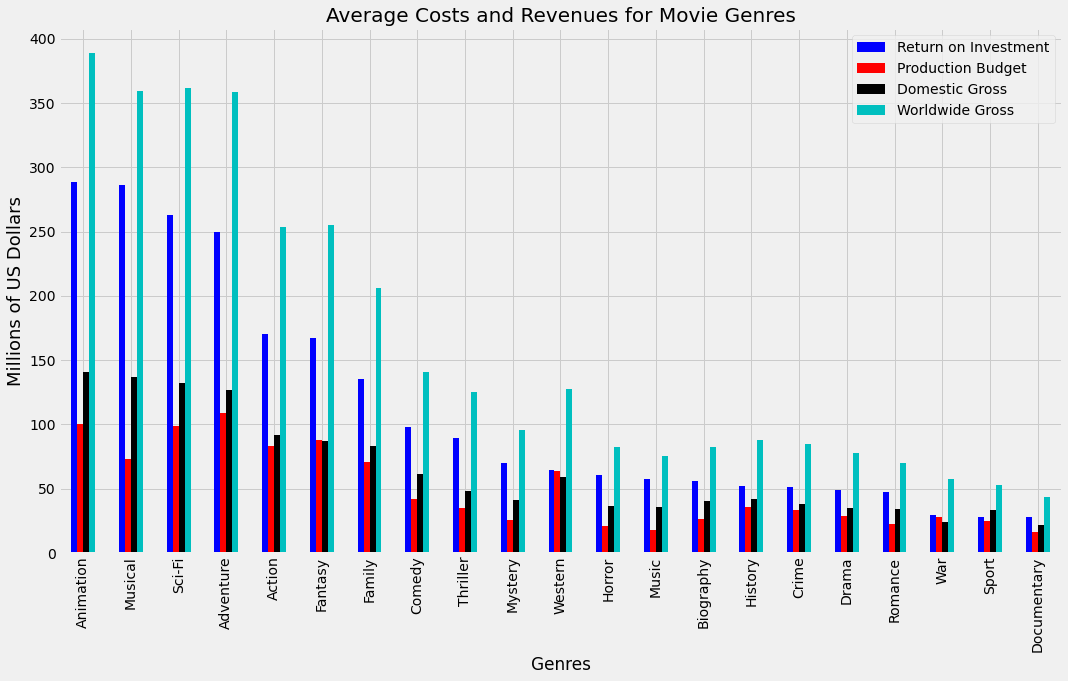

In [52]:
# This is the resulting bar plot, with ROI descending.  Dark blue was used with ROI to have it stand out. ROI was considered to
# be the most important variable as it determines profitability.  The other values were kept as one may wish to know likely 
# production costs for the various genres which can be revealed through production budget, or the amount of domestic and global
# appeal which can be evaluated visa via domestic and worldwide gross, respectively.

genre_roi.plot(kind='bar', figsize=[16,9], color = ['b', 'r', 'k', 'c'])         
plt.legend(['Return on Investment', 'Production Budget', 'Domestic Gross', 'Worldwide Gross'])
plt.title("Average Costs and Revenues for Movie Genres", fontsize=20)
plt.ylabel('Millions of US Dollars', fontsize=18);

In [53]:
# The correlation between World Wide Gross and ROI is high.
genre_roi["AVG_ROI"].corr(genre_roi["AVG_WW_Gross"])

0.993425225588679

In [54]:
# As is the correlation between Domestic Gross and ROI.
genre_roi["AVG_ROI"].corr(genre_roi["AVG_Dom_Gross"])

0.9907622235939796

In [55]:
# The describe funcion reveals the number of genres, the mean, the median, the standard deviation, and the 
# interquartile range of the dataframe.  
genre_roi.describe()

,AVG_ROI,AVG_Budget,AVG_Dom_Gross,AVG_WW_Gross
count,21.000000,21.000000,21.000000,21.000000
mean,111.590755,49.792578,64.321312,161.383333
std,89.422232,31.005644,39.705127,118.101133
min,27.836954,16.093708,21.594357,43.930662
25%,51.354882,26.029090,35.593247,77.772900
50%,64.489819,35.402969,41.921456,96.045168
75%,166.917536,73.112500,87.307723,253.587047
max,288.561604,108.712099,140.702119,388.755481


In [56]:
# The following function determines the number of movies in the various genres, the median, the mean, and the standard 
# deviation. The number of movies is particularly important as statistics are improved when one has more data.  The fact that 
# the musical genre only has 8 movies in it is particularly concerning.  The standard deviation is also important as it 
# indicates the likelihood of deviation from the mean.

roi_movies[['genres_list', 'roiinmil']].groupby(['genres_list']).agg(['count', 'median', 'mean', 'std'])

roiinmil                                    
               count      median        mean         std
genres_list                                             
Action           422   61.987606  170.186360  266.117287
Adventure        343  135.930148  249.801897  301.271734
Animation         98  213.845751  288.561604  281.277620
Biography        132   18.395522   56.265238  111.424312
Comedy           489   35.129909   98.275525  174.471145
Crime            222   17.371661   51.354882  129.769223
Documentary       48    3.251244   27.836954   64.087666
Drama            687   14.477051   49.335011  101.010972
Family            88   51.927284  135.626479  222.025257
Fantasy          119   49.911903  166.917536  249.370540
History           39   20.044909   52.232883   85.209008
Horror           157   28.985577   60.977703  101.430978
Music             50   12.687654   57.637477  134.894489
Musical            8   39.040070  286.175335  435.774205
Mystery          118   39.117894   70.016077   93.672098
Romance          182   19.210645   47.111438   74.856152
Sci-Fi           127  128.564919  263.055276  348.189022
Sport             33   14.217912   28.272505   45.077416
Thriller         240   34.607332   89.758719  170.667046
War               17   -1.973745   29.517132   69.730024
Western            9   -2.240304   64.489819  131.781607

### Directors

Directors who produced three or more movies were selected in order to filter out one-hit wonders.  The two directors with the highest average ROI, Joe and Anthony Russo, are brothers who direct their movies together and thus were combined onto a single row. They averaged over 1 billion dollars.  David Yates was the lowest of the top ten directors.  He averaged over 400 million dollars in ROI.

Four of the top ten directors produced movies based off of Marvel Comics and 2 produced movies based off of DC Comics.  Of these six directors, several have produced other well-known big-budget films (ex. James Wan - *Furious 7*, Christopher Nolan – *Dunkirk*, and Bryan Singer - *Bohemian Rhapsody*).   All of the movies based off of comics fell into the Action category. Most fell into the Adventure category, the Batman movie *The Dark Night Rises* being the sole exception.   All but *The Dark Night Rises* and *Aquaman* fell into the Sci-Fi genre.

Two of the directors produced movies based off of popular books - Peter Jackson (*The Hobbit* series) and David Yates (*Fantastic Beasts*).  *The Hobbit* and *Fantastic Beasts* fell into Adventure and Fantasy genres and often into the Family genre.

The remaining two directors produced Animated movies.  Chris Renaud	and Pierre Coffin both produced at least two *Despicable Me* movies.  Coffin also produced *Minions* and Renaud also produced The *Secret Life of Pets*.

The average ROI of the bottom ten directors with three or more movies ranged from a high of 18 million (Danny Boyle) to a low of -2.0 million (Jeff Nichols).   As it is possible that a director could be in the bottom ten due to having a smaller budget and not due to ineffectiveness, a search that took budget into consideration was done to examine this possibility.  All of Leslie Small’s movies were profitable and he had an average budget of less than 10 million dollars.   The rest of the directors in the bottom ten had average budgets greater than 10 million.

In [57]:
# SQL syntax was used to extract primary_name, AVG ROI, MAX ROI, and Min ROI from the roi_movies dataframe.  Directors who
# were deceased were filtered out (although there were none in the top ten) and only directors with 3 or more movies were 
# selected.  The results were grouped by director_id and ordered by average ROI.  The top 11 directors were chosen as Joe and 
# Anthony Russo took up the top two spots.  

q = """
SELECT  
       primary_name AS Name,
       AVG(roiinmil) AS AVG_ROI,
       MAX(roiinmil) AS MAX_ROI,
       MIN(roiinmil) AS MIN_ROI
FROM director_df
WHERE death_year IS NULL
GROUP BY director_id
    HAVING COUNT(movie_id) >= 3
ORDER BY AVG_ROI DESC
LIMIT 11
;
"""
top_ten_director = pysqldf(q)
top_ten_director

,Name,AVG_ROI,MAX_ROI,MIN_ROI
0,Joe Russo,1060.868501,1748.134200,544.401889
1,Anthony Russo,1060.868501,1748.134200,544.401889
2,James Wan,871.205858,1328.722794,298.000141
3,Pierre Coffin,854.936333,1086.336173,474.464573
4,Peter Jackson,724.316015,767.003568,695.577621
5,Christopher Nolan,584.045121,809.439099,349.837368
6,Michael Bay,565.999563,928.790543,55.275291
7,Chris Renaud,554.695860,899.216835,33.351496
8,Bryan Singer,438.768316,839.985342,2.687603
9,Ryan Coogler,433.825150,1148.258224,16.649645


In [58]:
# The name Anthony Russo was changed to Joe and Anthony Russo and the row that contained Joe Russo was dropped so
# that the dataframe didn't double-count the Russo brothers for having directed the same movies.

top_ten_director["Name"] = top_ten_director["Name"].str.replace('Anthony Russo','Joe and Anthony Russo')
top_ten_director = top_ten_director.drop(0)
top_ten_director

,Name,AVG_ROI,MAX_ROI,MIN_ROI
1,Joe and Anthony Russo,1060.868501,1748.134200,544.401889
2,James Wan,871.205858,1328.722794,298.000141
3,Pierre Coffin,854.936333,1086.336173,474.464573
4,Peter Jackson,724.316015,767.003568,695.577621
5,Christopher Nolan,584.045121,809.439099,349.837368
6,Michael Bay,565.999563,928.790543,55.275291
7,Chris Renaud,554.695860,899.216835,33.351496
8,Bryan Singer,438.768316,839.985342,2.687603
9,Ryan Coogler,433.825150,1148.258224,16.649645
10,David Yates,414.508321,622.402853,168.902025


In [59]:
# SQL syntax was also used to extract the bottom ten directors.  This time only ten were selected as there
# weren't any directors who exclusively worked together on movies.

q = """
SELECT  
       primary_name AS Name,
       AVG(roiinmil) AS AVG_ROI,
       MAX(roiinmil) AS MAX_ROI,
       MIN(roiinmil) AS MIN_ROI
FROM director_df
WHERE death_year IS NULL
GROUP BY director_id
    HAVING COUNT(movie_id) >= 3
ORDER BY AVG_ROI
LIMIT 10
;
"""
bottom_ten_director = pysqldf(q)

In [60]:
# The indexes were reset to Name to make plotting easier.
top_ten_director.set_index('Name', inplace=True)
bottom_ten_director.set_index('Name', inplace=True)

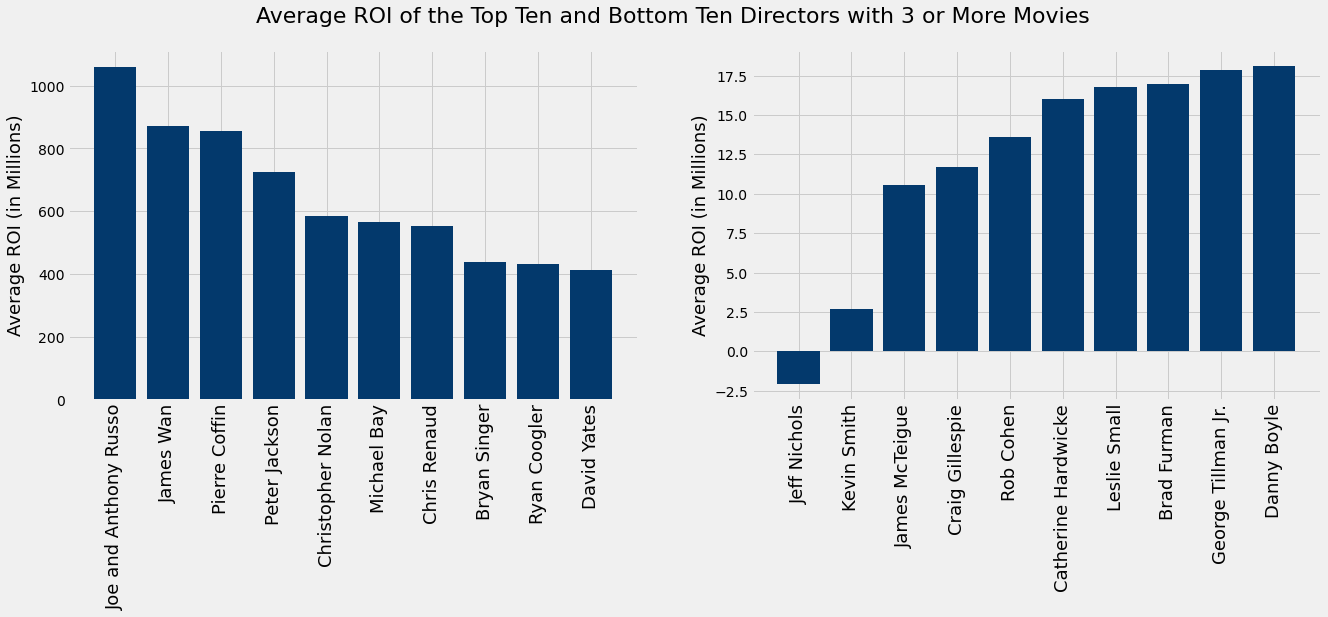

In [61]:
# Only the Average ROI was selected when making the plots in order to make the data visualization easier to understand.  
# This was done for both the top ten and the bottom ten in order to provide some insight about the range of the expected values.
# It should be noted that this is the top and bottom ten of the directors with 3 or movies that are contained within the IMBD 
# and The Numbers databases.  Directors who produce less well-known films are likely to be excluded due to their absence in the 
# datasets.

plt.figure(figsize=[20,6])
plt.suptitle("Average ROI of the Top Ten and Bottom Ten Directors with 3 or More Movies", size=22) 

plt.subplot(1,2,1)
plt.bar(x=top_ten_director.index, height='AVG_ROI', color = ['#03396c'], data = top_ten_director)
plt.xticks(rotation=90, fontsize=18)
plt.ylabel('Average ROI (in Millions)', fontsize=18)

plt.subplot(1,2,2)                                                  
plt.bar(x=bottom_ten_director.index, height='AVG_ROI', color = ['#03396c'], data = bottom_ten_director)
plt.xticks(rotation=90, fontsize=18)
plt.ylabel('Average ROI (in Millions)', fontsize=18);

In [89]:
# SQL syntax was also used to extract the movies the directors produced and the genres that they fell under.  This information
# is important as one should try to hire directors for the type of movies they are knwon for.  For example, if one is trying 
# to produce a Scooby-Doo movie and wants to target the family audience, one should probably avoid hiring Quentin Tarantino.
# Bryan Singer appears to have had this problem with Jack the Giant Slayer as it was considered too dark for families 
# and it wasn't particulary targeted to adults.  This being said, Bohemian Rhapsody wasn't an X-Men movie and he pulled 
# that off well.  

q = """
SELECT  
       primary_name AS Name,
       movie AS Movie,
       genres AS Genre,
       roiinmil AS ROI
FROM director_df
WHERE Name IN ("Anthony Russo", "James Wan",
             "Pierre Coffin", "Peter Jackson",
             "Christopher Nolan", "Michael Bay",
             "Chris Renaud", "Bryan Singer",
             "Ryan Coogler", "David Yates")
Order BY Name          
;
"""
movie_name = pysqldf(q)
movie_name

,Name,Movie,Genre,ROI
0,Anthony Russo,Captain America: The Winter Soldier,"Action,Adventure,Sci-Fi",544.401889
1,Anthony Russo,Captain America: Civil War,"Action,Adventure,Sci-Fi",890.069413
2,Anthony Russo,Avengers: Infinity War,"Action,Adventure,Sci-Fi",1748.134200
3,Bryan Singer,Jack the Giant Slayer,"Adventure,Fantasy",2.687603
4,Bryan Singer,Bohemian Rhapsody,"Biography,Drama,Music",839.985342
5,Bryan Singer,X-Men: Days of Future Past,"Action,Adventure,Sci-Fi",547.862775
6,Bryan Singer,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",364.537546
7,Chris Renaud,Despicable Me,"Animation,Comedy,Family",474.464573
8,Chris Renaud,Despicable Me 2,"Adventure,Animation,Comedy",899.216835
9,Chris Renaud,The Secret Life of Pets,"Adventure,Animation,Comedy",811.750534


In [63]:
# Directors with average budgets less than ten million dollars included in the bottom ten were extracted in order to 
# more fairly evaluate them.  

q = """
SELECT  
       primary_name AS Name,
       AVG(budgetinmil) AS AVG_Budget,
       AVG(roiinmil) AS AVG_ROI
FROM director_df
GROUP BY director_id
    HAVING COUNT(movie_id) >= 3 AND AVG_Budget < 10.0 AND AVG_ROI < 18.0
;
"""
bottom_ten_budget_director = pysqldf(q)

bottom_ten_budget_director

,Name,AVG_Budget,AVG_ROI
0,Leslie Small,4.416667,16.793578


In [64]:
# Leslie Small appears to have done alright for what he was trying to do.  He made profitable movies on smaller budgets.
director_df[director_df["primary_name"] == 'Leslie Small']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,director_id,release_date,movie,budgetinmil,domesticinmil,worldwideinmil,year,roiinmil
868,tt1999192,Kevin Hart: Laugh at My Pain,Kevin Hart: Laugh at My Pain,2011,89.0,"Comedy,Documentary",nm0806492,Leslie Small,NaN,NaN,"director,producer,editor",nm0806492,2011-09-09,Kevin Hart: Laugh at My Pain,0.75,7.706436,7.712436,2011,6.962436
1104,tt2609912,Kevin Hart: Let Me Explain,Kevin Hart: Let Me Explain,2013,75.0,"Comedy,Documentary",nm0806492,Leslie Small,NaN,NaN,"director,producer,editor",nm0806492,2013-07-03,Kevin Hart: Let Me Explain,2.50,32.244051,32.327255,2013,29.827255
1419,tt4669186,Kevin Hart: What Now?,Kevin Hart: What Now?,2016,96.0,"Comedy,Documentary",nm0806492,Leslie Small,NaN,NaN,"director,producer,editor",nm0806492,2016-10-14,Kevin Hart: What Now?,10.00,23.591043,23.591043,2016,13.591043


### Writers

Writers accredited with three or more movies were selected in order to filter out one-hit wonders.  Writers who are deceased were filtered out as they can no longer write movies.  Don Heck, Joe Simon, and J.R.R. Tolkien had been in the top ten without the filter.  Jim Starlin has the highest ROI, with an average movie grossing well over 1 billion dollars.  Stephen McFeely has the lowest of the top ten, with an average ROI of 603 million.  

4 of the top writers are either comic book writers or have made screenplays based off of comic books.   3 more have written animated films (Cinco Paul, Ken Daurio, Linda Woolverton).  The remaining 3 have written big budget action films (ex. *Jurassic World*, *Furious 7*, *The Hunger Games*).  

The average ROI of the bottom ten writers ranged from a high of 18 million (Stephen Susco) to a low of -14 million (David Dobkin).  A search that took budget into consideration was used to examine the bottom ten.  Kevin Smith and Nicole Holofcener both had average budgets less than 10 million.  None of Kevin Smith’s movies were profitable.  On the other hand, all of Nicole Holofcener’s movies were.

In [65]:
# The same SQL syntax used with the directors dataframe was used with the writers dataframe.  In the case of writers,
# 3 of the top ten were deceased prior to being filtered (two of which were asscociated with comic books).  It should be noted
# that if a person's death wasn't listed in the IMBD database, then they would still show up as being alive with this query 
# which could be an issue for less famous writers and directors.  There are multiple writers and directors without birth dates
# in the dataset. Hence, one must double check ones work (and/or drop more rows).  Age was intentionally not added as a 
# selecting factor due to societal norms, but it should be noted that Larry Lieber is in his 90s and is likely retired.  

q = """
SELECT  
       primary_name AS Name,
       AVG(roiinmil) AS AVG_ROI,
       MAX(roiinmil) AS MAX_ROI,
       MIN(roiinmil) AS MIN_ROI
FROM writer_df
WHERE death_year IS NULL
GROUP BY writer_id
    HAVING COUNT(movie_id) >= 3
ORDER BY AVG_ROI DESC
LIMIT 10
;
"""
top_ten_writer = pysqldf(q)
top_ten_writer

,Name,AVG_ROI,MAX_ROI,MIN_ROI
0,Jim Starlin,1140.471893,1748.134200,600.867516
1,Gary Scott Thompson,939.577505,1328.722794,505.163454
2,Joss Whedon,907.098356,1292.935897,355.945209
3,Derek Connolly,737.343010,1433.854864,3.672318
4,Larry Lieber,694.699391,1748.134200,299.326618
5,Cinco Paul,654.163457,959.727750,125.657593
6,Ken Daurio,654.163457,959.727750,125.657593
7,Linda Woolverton,652.538916,1099.199706,106.928112
8,Suzanne Collins,615.838336,734.868047,488.986787
9,Stephen McFeely,603.748576,1748.134200,55.275291


In [66]:
# Similar to the directors dataframe seen above.
q = """
SELECT  
       primary_name AS Name,
       AVG(roiinmil) AS AVG_ROI,
       MAX(roiinmil) AS MAX_ROI,
       MIN(roiinmil) AS MIN_ROI
FROM writer_df
WHERE death_year IS NULL
GROUP BY writer_id
    HAVING COUNT(movie_id) >= 3
ORDER BY AVG_ROI
LIMIT 10
;
"""
bottom_ten_writer = pysqldf(q)

In [67]:
# Similar to the directors dataframe.
top_ten_writer.set_index('Name', inplace=True)
bottom_ten_writer.set_index('Name', inplace=True)

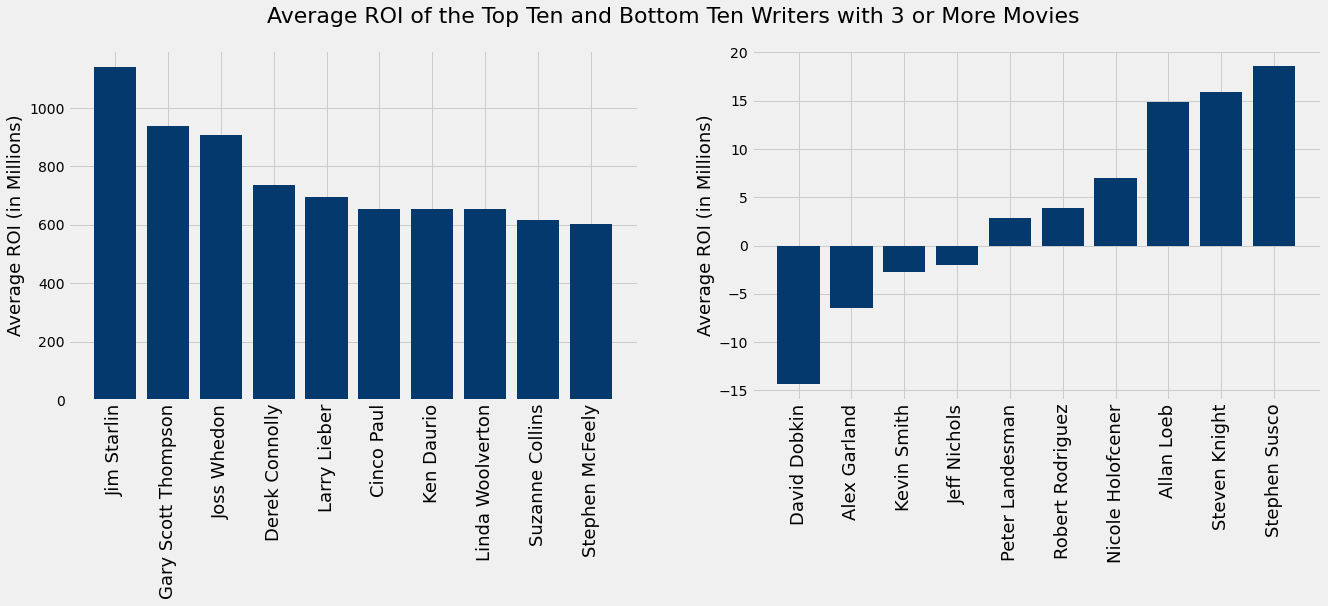

In [68]:
# Similar to the directors dataframe.
plt.figure(figsize=[20,6])
plt.suptitle("Average ROI of the Top Ten and Bottom Ten Writers with 3 or More Movies", size=22) 

plt.subplot(1,2,1)
plt.bar(x=top_ten_writer.index, height='AVG_ROI', color = ['#03396c'], data = top_ten_writer)
plt.xticks(rotation=90, fontsize=18)
plt.ylabel('Average ROI (in Millions)', fontsize=18)

plt.subplot(1,2,2)                                                  
plt.bar(x=bottom_ten_writer.index, height='AVG_ROI', color = ['#03396c'], data = bottom_ten_writer)
plt.xticks(rotation=90, fontsize=18)
plt.ylabel('Average ROI (in Millions)', fontsize=18);

In [90]:
# Similar to the directors dataframe.  It shold be noted that the writers Cinco Paul and Ken Daurio like to work together,
# often under the direction of Chris Renaud and/or Pierre Coffin.

q = """
SELECT  
       primary_name AS Name,
       movie AS Movie,
       genres AS Genre,
       roiinmil AS ROI
FROM writer_df
WHERE Name IN ("Jim Starlin", "Gary Scott Thompson", 
              "Joss Whedon", "Derek Connolly",
              "Larry Lieber", "Cinco Paul",
              "Ken Daurio", "Linda Woolverton",
              "Suzanne Collins", "Stephen McFeely")
Order BY Name          
;
"""
writer_movie_name = pysqldf(q)
writer_movie_name

,Name,Movie,Genre,ROI
0,Cinco Paul,Despicable Me,"Animation,Comedy,Family",474.464573
1,Cinco Paul,Hop,"Adventure,Animation,Comedy",125.657593
2,Cinco Paul,Despicable Me 2,"Adventure,Animation,Comedy",899.216835
3,Cinco Paul,The Secret Life of Pets,"Adventure,Animation,Comedy",811.750534
4,Cinco Paul,Despicable Me 3,"Adventure,Animation,Comedy",959.727750
5,Derek Connolly,Jurassic World,"Action,Adventure,Sci-Fi",1433.854864
6,Derek Connolly,Safety Not Guaranteed,"Comedy,Drama,Romance",3.672318
7,Derek Connolly,Kong: Skull Island,"Action,Adventure,Fantasy",376.072059
8,Derek Connolly,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1135.772799
9,Gary Scott Thompson,Fast Five,"Action,Crime,Thriller",505.163454


In [70]:
# Similar to the directors dataframe. 
q = """
SELECT  
       primary_name AS Name,
       AVG(budgetinmil) AS AVG_Budget,
       AVG(roiinmil) AS AVG_ROI
FROM writer_df
GROUP BY writer_id
    HAVING COUNT(movie_id) >= 3 AND AVG_Budget < 10.0 AND AVG_ROI < 18.0
;
"""
bottom_ten_budget_writer = pysqldf(q)

bottom_ten_budget_writer

,Name,AVG_Budget,AVG_ROI
0,Kevin Smith,4.0,-2.701964
1,Nicole Holofcener,7.0,6.981338


In [71]:
# It looks like Kevin Smith deserves to be in the bottom ten.  None of his movies are profitable. 
writer_df[writer_df["primary_name"] == 'Kevin Smith']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,writer_id,release_date,movie,budgetinmil,domesticinmil,worldwideinmil,year,roiinmil
272,tt0873886,Red State,Red State,2011,88.0,"Action,Crime,Horror",nm0003620,Kevin Smith,1970.0,NaN,"producer,writer,actor",nm0003620,2011-09-23,Red State,4.0,1.065429,1.983596,2011,-2.016404
2834,tt3099498,Tusk,Tusk,2014,102.0,"Comedy,Drama,Horror",nm0003620,Kevin Smith,1970.0,NaN,"producer,writer,actor",nm0003620,2014-09-19,Tusk,3.0,1.821983,1.887554,2014,-1.112446
3141,tt3838992,Yoga Hosers,Yoga Hosers,2016,88.0,"Action,Comedy,Fantasy",nm0003620,Kevin Smith,1970.0,NaN,"producer,writer,actor",nm0003620,2016-09-02,Yoga Hosers,5.0,0.000000,0.022958,2016,-4.977042


In [72]:
# Nicole Holofcener has been profitable.

writer_df[writer_df["primary_name"] == 'Nicole Holofcener']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,writer_id,release_date,movie,budgetinmil,domesticinmil,worldwideinmil,year,roiinmil
273,tt0878835,Please Give,Please Give,2010,87.0,"Comedy,Drama",nm0392237,Nicole Holofcener,1960.0,NaN,"director,writer,actress",nm0392237,2010-04-30,Please Give,3.0,4.033574,4.570178,2010,1.570178
2519,tt2390361,Enough Said,Enough Said,2013,93.0,"Comedy,Drama,Romance",nm0392237,Nicole Holofcener,1960.0,NaN,"director,writer,actress",nm0392237,2013-09-18,Enough Said,8.0,17.550872,25.621449,2013,17.621449
3316,tt4595882,Can You Ever Forgive Me?,Can You Ever Forgive Me?,2018,106.0,"Biography,Comedy,Crime",nm0392237,Nicole Holofcener,1960.0,NaN,"director,writer,actress",nm0392237,2018-10-19,Can You Ever Forgive Me?,10.0,8.803865,11.752387,2018,1.752387


 ### Writers and Directors with 3 or More Movies

As it is possible that top candidates aren’t available due to demand from other film productions or retirement, the average ROI for all directors and writers with 3 or more movies was examined.  For directors, the median ROI was 124 million dollars and 50% of directors have an average ROI between 58 to 271 million dollars.  The median ROI for the worst film these directors produced was 19 million dollars and the median for the best film was 230 million dollars.  One should be cautious hiring any director who has produced a major film that has an ROI of less than 19 million and hasn’t produced a film that has an ROI of more than 230 million.  On the other hand, directors whose worst film has an ROI of more than 57 million and whose best film has an ROI of more than 488 million are among the top 25th percentile of the directors in this dataset.  

For writers, the median ROI was 162 million dollars and 50% of writers have an average ROI between 86 to 319 million dollars.  The median ROI for the worst film these writers produced was 22 million dollars and the median for the best film was 360 million dollars.  One should be cautious hiring any writer who has produced a film that has an ROI of less than 22 million and hasn’t produced a film that has an ROI of more than 360 million.  On the other hand, writers whose worst film has an ROI of more than 68 million and whose best film has an ROI of more than 597 million are among the top 25th percentile of the writers in this dataset.

In [73]:
# This SQL syntax is being used to collect ROI data of all directors with 3 or more movies so it can be plotted
# as a box plot that can be used to help gauge a director's effectiveness.

q = """
SELECT  
       primary_name AS Name,
       MIN(roiinmil) AS MIN_ROI,
       AVG(roiinmil) AS AVG_ROI,
       MAX(roiinmil) AS MAX_ROI
FROM director_df
GROUP BY director_id
    HAVING COUNT(movie_id) >= 3
ORDER BY AVG_ROI DESC
;
"""
director_roi = pysqldf(q)

In [74]:
# These are some of the numbers that will be plotted in the box plot. While these numbers can be used as a guide, they 
# cannot be interpreted as absoulute criteria. For example, based on MIN ROI, Bryan Singer would be considered 
# a poor director based off Jack the Giant Slayer.  His other movies, however, strongly suggest that this isn't the case.
director_roi.describe()

,MIN_ROI,AVG_ROI,MAX_ROI
count,124.000000,124.000000,124.000000
mean,55.100668,190.119782,352.457389
std,120.198733,201.393435,332.164721
min,-106.900000,-2.066557,3.898064
25%,-2.097597,58.065475,120.607944
50%,19.173475,124.162351,230.693026
75%,57.964044,271.955655,488.677639
max,695.577621,1060.868501,1748.134200


In [75]:
# Similar to the directors dataframe. 
q = """
SELECT  
      primary_name AS Name,
      MIN(roiinmil) AS MIN_ROI, 
      AVG(roiinmil) AS AVG_ROI,
      MAX(roiinmil) AS MAX_ROI
FROM writer_df
WHERE death_year IS NULL
GROUP BY writer_id
    HAVING COUNT(movie_id) >= 3
ORDER BY AVG_ROI DESC
;
"""
writer_roi = pysqldf(q)

In [76]:
# Similar to the directors dataframe. 
writer_roi.describe()

,MIN_ROI,AVG_ROI,MAX_ROI
count,249.000000,249.000000,249.000000
mean,50.012844,222.135171,432.159770
std,92.197768,190.918037,355.121472
min,-200.237650,-14.371499,-3.532394
25%,-2.476980,86.332529,154.041804
50%,22.531552,162.042402,360.004754
75%,68.345423,319.625484,597.923379
max,600.867516,1140.471893,1748.134200


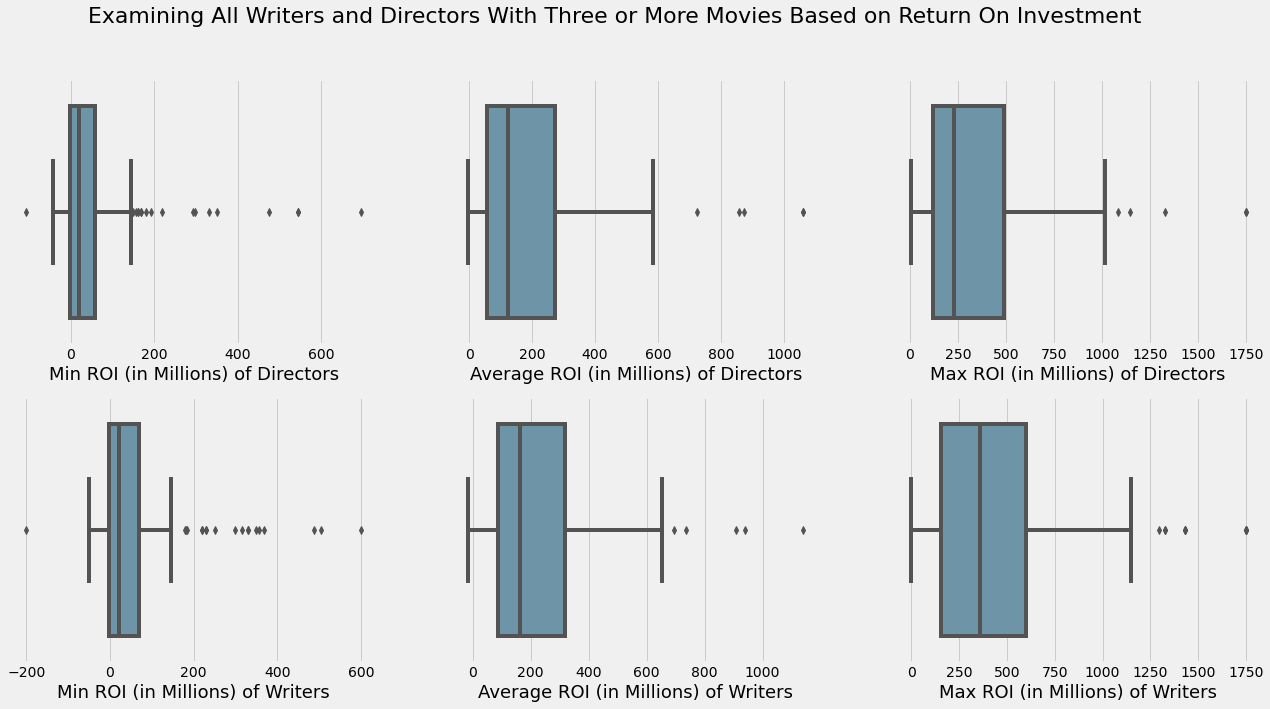

In [77]:
# These are the resulting box plots formed from the data collected from the above SQL queries. Directors is shown above
# and writers is shown below.  The line in the middle of the box represents the median and the box itself represents the 
# interquartile range which is where 50 percent of the results lie.  Anything outside of the "whiskers" of the box plot is
# considered to be an outlier.  In case you are wonderng what that -200 million outlier in the MIN ROI writers dataframe is, 
# the answer is X-Men: Dark Phoenix, a movie with a large budget that bombed.  


plt.figure(figsize=[20,10])
plt.suptitle("Examining All Writers and Directors With Three or More Movies Based on Return On Investment", size=22) 

plt.subplot(2,3,1)
sns.boxplot(director_roi.MIN_ROI, color='#6497b1')
plt.xlabel('Min ROI (in Millions) of Directors', fontsize=18)

plt.subplot(2,3,2)
sns.boxplot(director_roi.AVG_ROI, color='#6497b1')
plt.xlabel('Average ROI (in Millions) of Directors', fontsize=18)

plt.subplot(2,3,3)
sns.boxplot(director_roi.MAX_ROI, color='#6497b1')
plt.xlabel('Max ROI (in Millions) of Directors', fontsize=18) 

plt.subplot(2,3,4)
sns.boxplot(writer_roi.MIN_ROI, color='#6497b1')
plt.xlabel('Min ROI (in Millions) of Writers', fontsize=18);

plt.subplot(2,3,5)
sns.boxplot(writer_roi.AVG_ROI, color='#6497b1')
plt.xlabel('Average ROI (in Millions) of Writers', fontsize=18)

plt.subplot(2,3,6)
sns.boxplot(writer_roi.MAX_ROI, color='#6497b1')
plt.xlabel('Max ROI (in Millions) of Writers', fontsize=18);

## Conclusions

- **Resist the temptation to make a movie based off of *Call of Duty***  
    In general, war movies do not do well. The genres that are best suited for Microsoft are Animation, Sci-Fi, Fantasy, Action, Adventure, and Family. These genres have higher production costs which means smaller companies are less likely to take risks on them due to fear of becoming insolvent.  Hence, the only likely competition is with other industry giants.  Unless done as an Animated Family film like *Beauty and the Beast*, it is probably best to avoid the Musical genre.  There aren't enough movies in the dataset to support the genre's inclusion in the top tier and Musicals don't take advantage of the two main strengths Microsoft has – high market capitalization and in-house CGI talent. *Diablo*, *Overwatch*, *World of Warcraft* and *StarCraft* are Activision titles that have the potential to be turned into movies due to their Sci-Fi, Fantasy, Action, and Adventure elements.  [*World of Warcraft*](https://www.imdb.com/video/vi4072453145/?playlistId=tt0803096&ref_=tt_pr_ov_vi)  has been produced before (profitably) and a sequel or remake may be a good entry point into the movie space.  It would be difficult to pull off, but *Candy Crush* could be turned into an Animated Family movie.
   
   
-	**Hire top directing talent for that genre**  
    For films in the Sci FI / Action / Adventure / Fantasy categories, the Russo brothers, Bryan Singer, Christopher Nolan, David Yates, James Wan,  Michael Bay, Peter Jackson, and Ryan Coogler are all top-notch talent.  For the Animated / Family categories, Chris Renaud and Pierre Coffin are better choices.   As a rule of thumb, one should be looking for directors whose average ROI is above 271 million dollars and whose worst major film production had an ROI no lower than 19 million.  This having been said, there are exceptions to this rule, Bryan Singer being one of them.
    
    
-	**Hire top writing talent for that genre**  
    For films in the Sci FI / Action / Adventure / Fantasy categories, Jim Starlin, Gary Scott Thompson, Joss Whedon, Derek Connolly, Suzanne Collins and Stephen McFeely are all top-notch talent.  Larry Lieber might be able to be hired as a consultant, but the fact he is in his 90s probably precludes him from being the primary writer.  For films in the Animated / Family categories, Cinco Paul, Ken Daurio, and Linda Woolverton are better candidates.  As a rule of thumb, one should be looking for writers whose average ROI is above 319 million dollars and whose worst major film production had an ROI no lower than 22 million.  There are also exceptions to this rule, Derek Connolly being one of them.

## Next Steps

- **Investigate the interest level of a *Warcraft* sequel or remake.**  
    With an ROI of 265 million, the profits of the original movie were average. By comparison, *The Hobbit* films had an average ROI of 724 million despite having similar stylistic elements. Consider bringing in better writing and directing talent as those are possible reasons for its lackluster performance.  If it becomes a huge success, it could be turned into a series of moives much like *Jurassic Park* or *Iron Man*.
    
    
- **Investigate *Overwatch*.**  
    There was an abortive attempt to make *Overwatch* into a Netflix movie or series.  Microsoft now owns the rights.  Consider using them.


- **Consider creating a movie studio.**  
    Microsoft’s in-house CGI talent puts it in a prime position to make Animated films which is the highest grossing genre.  CGI is also used in the highly profitable Action, Sci-Fi, Adventure, and Fantasy genres.  What Microsoft lacks is access to writing and directing talent.  A studio with talent scouts and recruiters from the movie industry could help with that.  It would also be helpful with rebranding and marketing.  "A movie brought to you by Activision Studios" probably sounds better to most people than "A movie brought to you by Microsoft."